In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [28]:
dataset=pd.read_csv('./Google_Stock_Price_Train.csv', index_col="Date", parse_dates=True)

In [29]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [30]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


<Axes: xlabel='Date'>

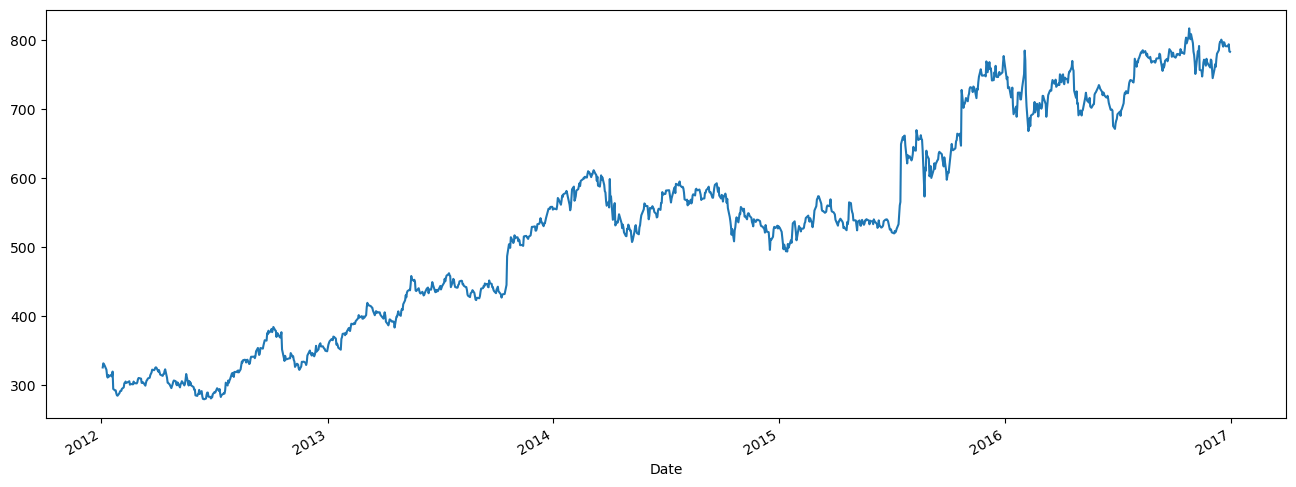

In [32]:
dataset['Open'].plot(figsize=(16,6))

In [33]:
train = dataset.loc[:, ['Open']].values 
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [34]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [35]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 1250):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [36]:
#Reshaping:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [43]:
#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - loss: 0.4426
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.2365
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.1717
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.1261
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.1000
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0760
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0704
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0589
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0491
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0445
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0372
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0286
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0278
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0260
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0221
Epo

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'dataset' is a pandas DataFrame and contains the 'Open' column
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(dataset[['Open']])

# Combine data to prepare inputs
dataset_total = pd.concat((dataset['Open'], dataset['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset) - 60:].values

# Reshape and transform inputs
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Prepare test data
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict and inverse transform
pred_price = regressor.predict(X_test)  # Assuming `regressor` is your trained model
pred_price = sc.inverse_transform(pred_price)

print(pred_price)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[784.2296 ]
 [666.8077 ]
 [531.0909 ]
 [472.34213]
 [464.43576]
 [424.74872]
 [377.13434]
 [341.1639 ]
 [337.12158]
 [352.59464]
 [329.61475]
 [304.15985]
 [299.29626]
 [303.13348]
 [304.95535]
 [291.60187]
 [282.23123]
 [283.64154]
 [285.49008]
 [278.27817]]


In [41]:
real_stock_price=dataset.iloc[:, 1:2].values

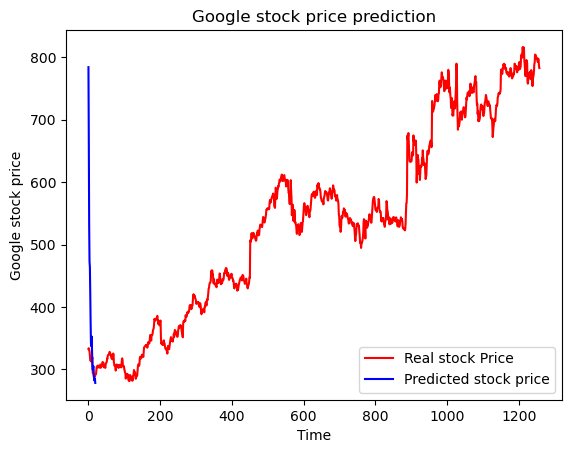

In [42]:
plt.plot(real_stock_price, color="red", label="Real stock Price")
plt.plot(pred_price, color="blue", label="Predicted stock price")
plt.title("Google stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google stock price")
plt.legend()
plt.show()